# Dyads analysis

Text(0.5, 1.0, 'Original image')

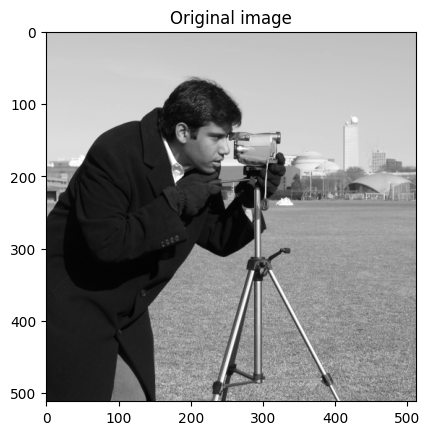

In [2]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
img=skimage.data.camera()
X=np.array(img)
plt.imshow(X, cmap="gray")
plt.title("Original image")

Singular value plot

(512, 512)


Text(0.5, 1.0, 'Singular values')

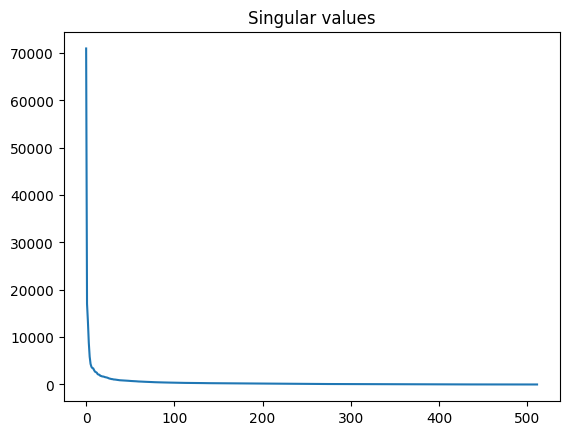

In [3]:
print(X.shape)
U, s, VT = np.linalg.svd(X, full_matrices=False)
plt.plot(s)
plt.title("Singular values")


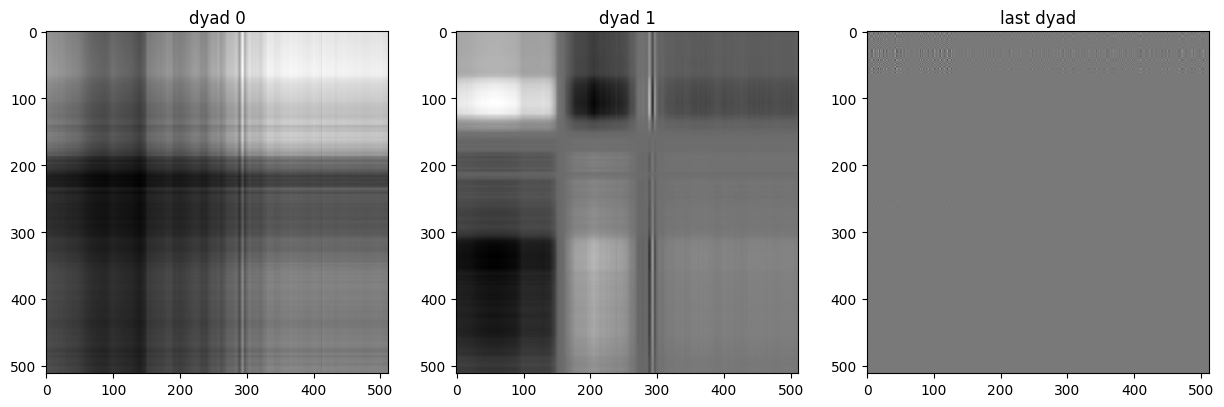

In [7]:
d=[0,1,-2]
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in d:
    plt.subplot(1,3,d.index(i)+1)
    Ai=U[:,i:i+1]@VT[i:i+1,:]
    Ai*=s[0]
    plt.imshow(np.reshape(Ai, (512, 512)), cmap="gray")
    if i==-2:
        plt.title("last dyad")
    else:
        plt.title("dyad "+str(i))

Text(0.5, 1.0, 'k=511; Error=2.0294383535972327e-10')

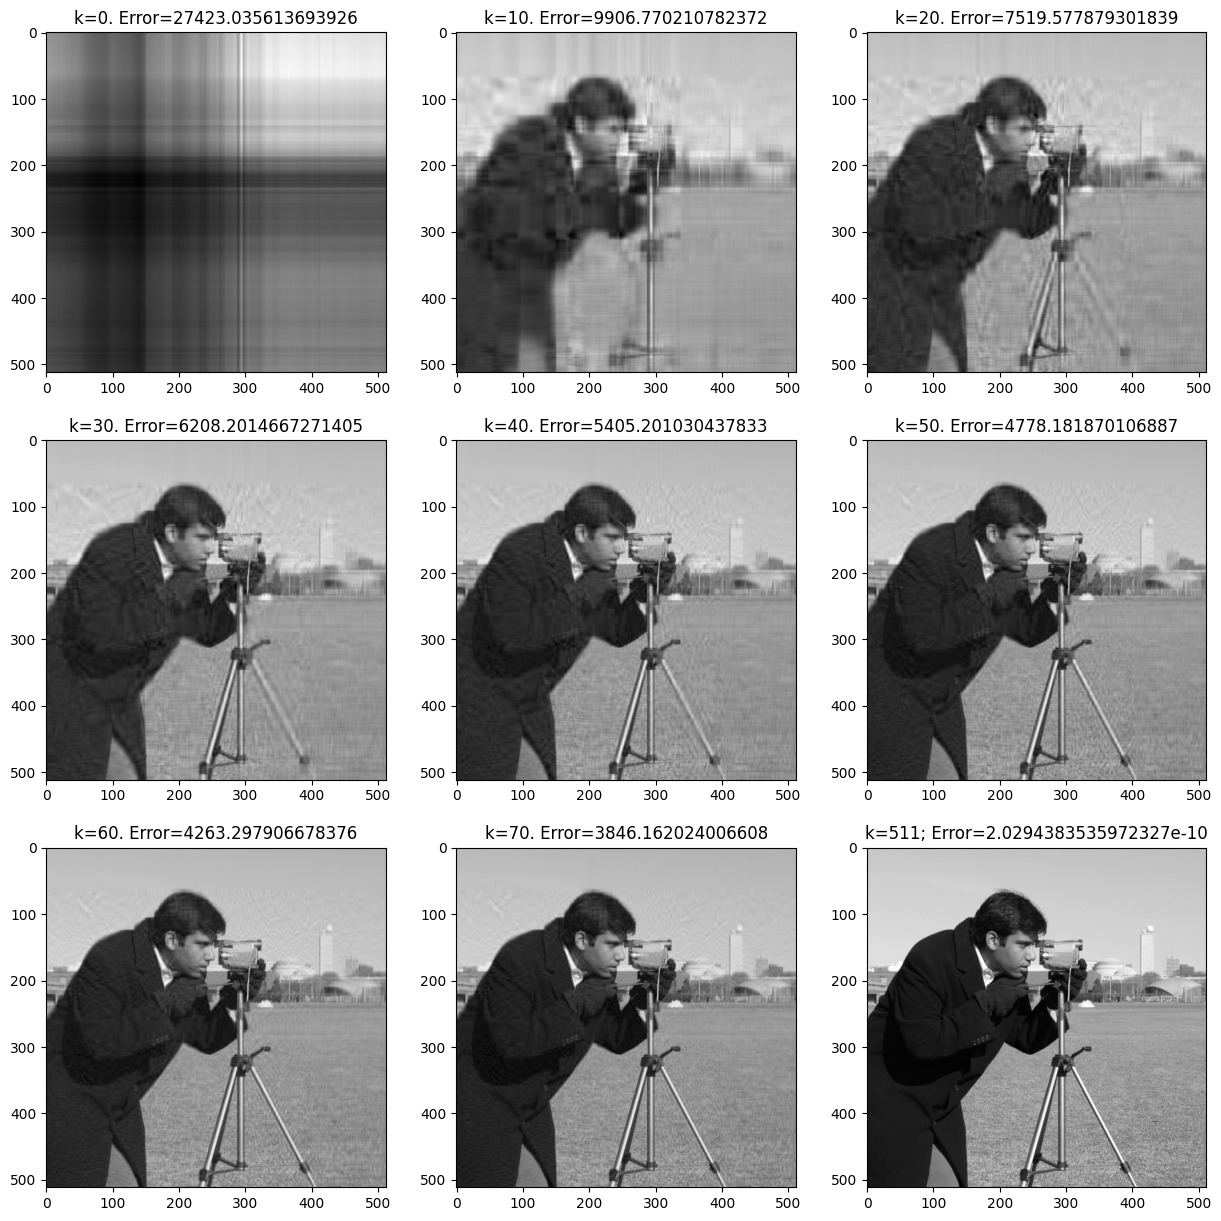

In [5]:
k=512
sum=0
E=np.zeros((512,))
Ai=np.zeros((512,512))
fig, ax= plt.subplots(3,3, figsize=(15,15))
pi=0
pj=0
for i in range(k):
    Ai+=(U[:,i:i+1]@VT[i:i+1,:])*s[i]
    E[i]=np.linalg.norm(X-Ai)
    if(i%10==0 and i<80):
        ax[pi][pj].imshow(np.reshape(Ai, (512, 512)), cmap="gray")
        ax[pi][pj].set_title(f"k={i}. Error={E[i]}")
        pj+=1
        if(pj==3):
            pj=0
            pi+=1
ax[2][2].imshow(np.reshape(Ai, (512, 512)), cmap="gray")
ax[2][2].set_title(f"k={i}; Error={E[i]}")


Text(0, 0.5, 'Error')

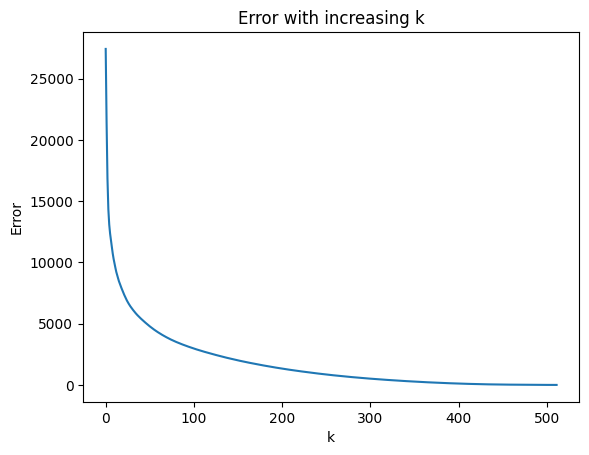

In [6]:
plt.plot(E)
plt.title("Error with increasing k")
plt.xlabel("k")
plt.ylabel("Error")